## Amdahl's Law 

Improving a portion _p_ of a computation by factor _s_ results in an overall speedup of

<img src="./images/al1.png" width="256" title="Amdahl's Law Equation" />

* _p_ is the proportion of execution time that benefits from improved resources, i.e. the parallel part
* _(1-p)_ is the portion that does not benefit; i.e. the serial part
* _s_ is the speedup of the optimized part
* _S<sub>latency</sub>(s)_ theoretical speedup of the whole task

Paraphrased: speedup limited to fraction improved

<img src="./images/al2.png" width="512" title="Amdahl's Law Graph" />

### Visualizing Amdahl's Law

Let's look at the Amdahl curve for a given parallel fraction (.95).


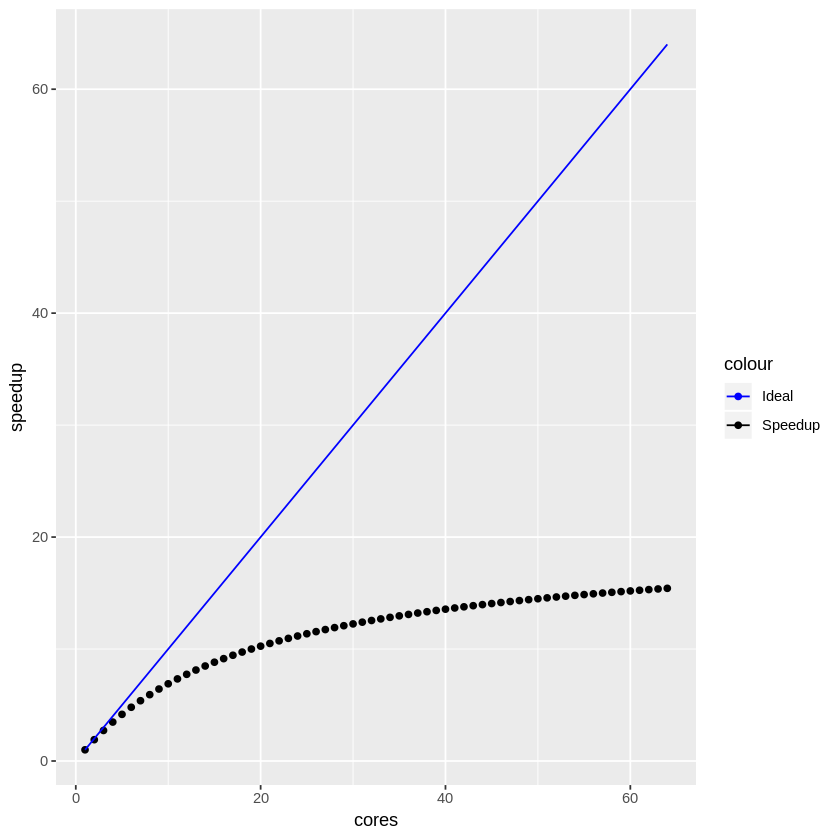

In [75]:
library(ggplot2)

# Let's assume we have a 4 socket x 16 core machine.  So up to 64 cores.
cores = seq(1:1:64)

p = .95
        
amdahl <- data.frame(cores, 1/((1-p)+p/cores))
colnames(amdahl) <- c("cores","speedup")

aplot <- ggplot(amdahl, aes(x=cores, y=speedup, color="Speedup")) + geom_point() +
            geom_line(data=amdahl, aes(x=cores,y=cores, color="Ideal")) +
            scale_color_manual(values = c("Speedup" = 'black','Ideal' = 'blue'))

print(aplot)



Let's now look at how performance scales as function of the parallel fraction.

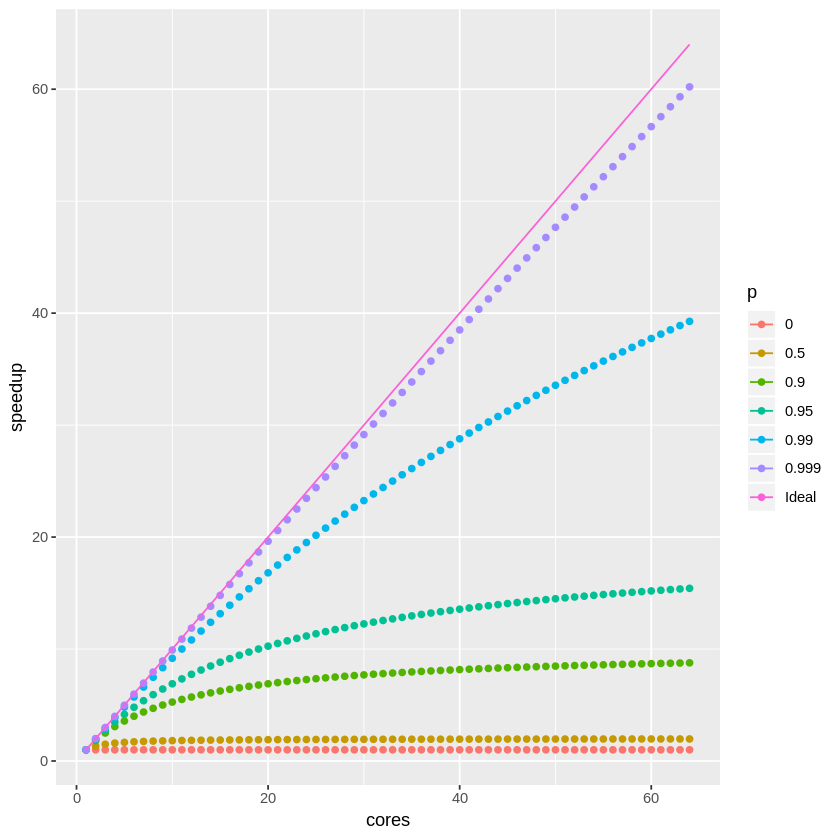

In [79]:
library(ggplot2)

# Let's assume we have a 4 socket x 16 core machine.  So up to 64 cores.
cores = seq(1:1:64)

# and a parallel fraction of 99%
p = factor(c(0,.5,.9,.95,.99,.999))

# build a data frame 
df <- data.frame(crossing(cores,p))
df$pnumeric <- as.numeric(levels(df$p))[df$p]

# with speedup
df$speedup <- 1/((1-df$pnumeric)+df$pnumeric/df$cores)

plt <- ggplot(df, aes(x=cores, y=speedup))+geom_point(aes(color=p))+
            geom_line(data=df, aes(x=cores,y=cores, color="Ideal"))

print(plt)

### Infering parallelism from Amdahl's Law